In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
chunksize = 100000  # Load 100,000 rows at a time
df_chunk = pd.read_csv('MTA_Subway.csv', chunksize=chunksize, low_memory=False)

# Combine all chunks into a single DataFrame
df = pd.concat(df_chunk, ignore_index=True)

In [2]:
# Display general information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64324734 entries, 0 to 64324733
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transit_timestamp    object 
 1   transit_mode         object 
 2   station_complex_id   object 
 3   station_complex      object 
 4   borough              object 
 5   payment_method       object 
 6   fare_class_category  object 
 7   ridership            int64  
 8   transfers            int64  
 9   latitude             float64
 10  longitude            float64
 11  Georeference         object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.8+ GB
None


In [3]:
# Check the data
print(df.head())

        transit_timestamp transit_mode station_complex_id   station_complex  \
0  07/06/2023 11:00:00 PM       subway                133   Atlantic Av (L)   
1  07/06/2023 05:00:00 AM       subway                182      Ralph Av (C)   
2  07/06/2023 10:00:00 AM       subway                262       67 Av (M,R)   
3  07/06/2023 08:00:00 AM       subway                181    Utica Av (A,C)   
4  07/06/2023 05:00:00 PM       subway                153  125 St (A,C,B,D)   

     borough payment_method           fare_class_category  ridership  \
0   Brooklyn           omny              OMNY - Full Fare          7   
1   Brooklyn           omny              OMNY - Full Fare         30   
2     Queens      metrocard         Metrocard - Fair Fare          8   
3   Brooklyn      metrocard  Metrocard - Unlimited 30-Day        155   
4  Manhattan      metrocard  Metrocard - Unlimited 30-Day        201   

   transfers   latitude  longitude                 Georeference  
0          0  40.675346 -7

In [4]:
# Check for missing values
print(df.isnull().sum())

transit_timestamp      0
transit_mode           0
station_complex_id     0
station_complex        0
borough                0
payment_method         0
fare_class_category    0
ridership              0
transfers              0
latitude               0
longitude              0
Georeference           0
dtype: int64


In [5]:
print(df.dtypes)

transit_timestamp       object
transit_mode            object
station_complex_id      object
station_complex         object
borough                 object
payment_method          object
fare_class_category     object
ridership                int64
transfers                int64
latitude               float64
longitude              float64
Georeference            object
dtype: object


In [6]:
# Convert the 'transit_timestamp' column to datetime format with the correct format
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

# Check updated data types
print(df.dtypes)

transit_timestamp      datetime64[ns]
transit_mode                   object
station_complex_id             object
station_complex                object
borough                        object
payment_method                 object
fare_class_category            object
ridership                       int64
transfers                       int64
latitude                      float64
longitude                     float64
Georeference                   object
dtype: object


In [7]:
# Display column names
print(df.columns)

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')


In [8]:
# Detect duplicated rows
duplicates = df.duplicated()

# View the duplicated rows
df[duplicates]

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference


In [9]:
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,2023-07-06 23:00:00,subway,133,Atlantic Av (L),Brooklyn,omny,OMNY - Full Fare,7,0,40.675346,-73.903100,POINT (-73.9031 40.675346)
1,2023-07-06 05:00:00,subway,182,Ralph Av (C),Brooklyn,omny,OMNY - Full Fare,30,1,40.678820,-73.920784,POINT (-73.920784 40.67882)
2,2023-07-06 10:00:00,subway,262,"67 Av (M,R)",Queens,metrocard,Metrocard - Fair Fare,8,0,40.726524,-73.852720,POINT (-73.85272 40.726524)
3,2023-07-06 08:00:00,subway,181,"Utica Av (A,C)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,155,0,40.679363,-73.930730,POINT (-73.93073 40.679363)
4,2023-07-06 17:00:00,subway,153,"125 St (A,C,B,D)",Manhattan,metrocard,Metrocard - Unlimited 30-Day,201,0,40.811108,-73.952350,POINT (-73.95235 40.811108)
...,...,...,...,...,...,...,...,...,...,...,...,...
64324729,2023-07-06 05:00:00,subway,150,155 St (C),Manhattan,metrocard,Metrocard - Other,1,0,40.830517,-73.941510,POINT (-73.94151 40.830517)
64324730,2023-07-06 23:00:00,subway,384,Burnside Av (4),Bronx,metrocard,Metrocard - Unlimited 7-Day,13,0,40.853455,-73.907684,POINT (-73.907684 40.853455)
64324731,2023-07-06 22:00:00,subway,183,Rockaway Av (C),Brooklyn,omny,OMNY - Full Fare,26,0,40.678340,-73.911950,POINT (-73.91195 40.67834)
64324732,2023-07-06 04:00:00,subway,144,Dyckman St (A),Manhattan,metrocard,Metrocard - Fair Fare,2,0,40.865490,-73.927270,POINT (-73.92727 40.86549)


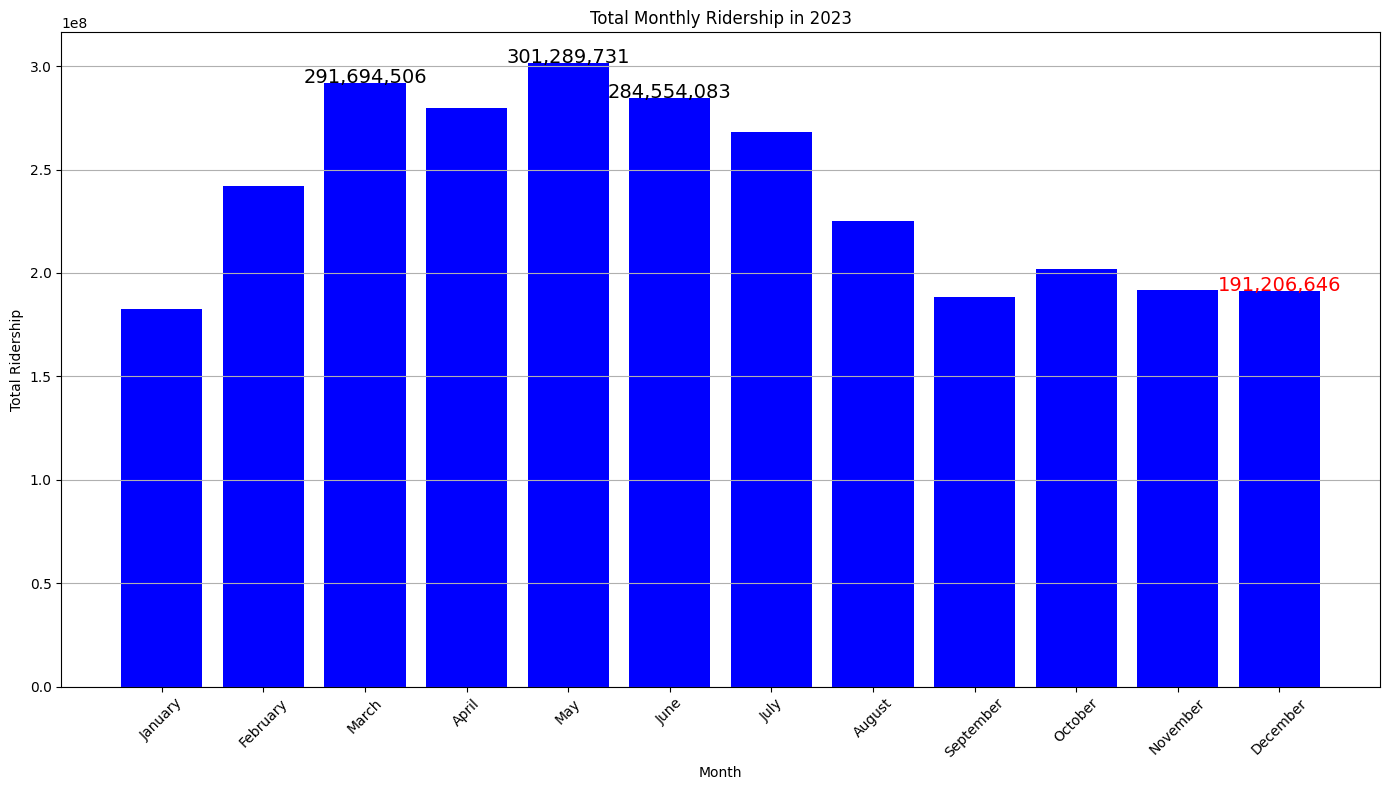

In [10]:
# Extract year and month information
df['year'] = df['transit_timestamp'].dt.year
df['month'] = df['transit_timestamp'].dt.month

# Calculate total ridership for all months
monthly_ridership = df.groupby('month')['ridership'].sum()

# Create bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(monthly_ridership.index, monthly_ridership, color='blue')

# Identify the top 3 months with highest ridership
top_3 = monthly_ridership.nlargest(3)

# Get ridership for December
december_ridership = monthly_ridership[12] if 12 in monthly_ridership.index else 0

# Highlight the top 3 months in red
for month in top_3.index:
    plt.annotate(f'{monthly_ridership[month]:,}', 
                 xy=(month, monthly_ridership[month]), 
                 xytext=(month, monthly_ridership[month] + 5000), 
                 ha='center', color='black', fontsize=14)

# Highlight December ridership in red
if december_ridership > 0:
    plt.annotate(f'{december_ridership:,}', 
                 xy=(12, december_ridership), 
                 xytext=(12, december_ridership + 5000), 
                 ha='center', color='red', fontsize=14)

# Beautify the chart
plt.title('Total Monthly Ridership in 2023')
plt.xlabel('Month')
plt.ylabel('Total Ridership')
plt.xticks(ticks=range(1, 13), labels=['January', 'February', 'March', 'April', 'May', 'June', 
                                       'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
monthly_ridership

month
1     182698277
2     241840124
3     291694506
4     279891617
5     301289731
6     284554083
7     268349410
8     225232147
9     188186833
10    201678820
11    191699117
12    191206646
Name: ridership, dtype: int64

In [12]:
# October, November, and December 2023
start_date = '2023-12-01'
end_date = '2023-12-31'

df = df[(df['transit_timestamp'] >= start_date) & 
        (df['transit_timestamp'] <= end_date)]

# Sort by date column (ascending)
df = df.sort_values(by='transit_timestamp', ascending=True)

# Check the result
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,year,month
58135584,2023-12-01,subway,183,Rockaway Av (C),Brooklyn,omny,OMNY - Full Fare,6,0,40.678340,-73.911950,POINT (-73.91195 40.67834),2023,12
58169962,2023-12-01,subway,428,"174 St (2,5)",Bronx,metrocard,Metrocard - Fair Fare,3,0,40.837288,-73.887730,POINT (-73.88773 40.837288),2023,12
58102097,2023-12-01,subway,108,Middle Village-Metropolitan Av (M),Queens,metrocard,Metrocard - Full Fare,2,1,40.711395,-73.889600,POINT (-73.8896 40.711395),2023,12
58129543,2023-12-01,subway,58,"Coney Island-Stillwell Av (D,F,N,Q)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,6,0,40.577423,-73.981230,POINT (-73.98123 40.577423),2023,12
58188175,2023-12-01,subway,39,Bay Ridge-95 St (R),Brooklyn,metrocard,Metrocard - Seniors & Disability,1,1,40.616623,-74.030876,POINT (-74.030876 40.616623),2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201947,2023-12-31,subway,257,Sutphin Blvd (F),Queens,metrocard,Metrocard - Unlimited 30-Day,1,0,40.705460,-73.810710,POINT (-73.81071 40.70546),2023,12
31201950,2023-12-31,subway,42,"Prospect Park (B,Q,S)",Brooklyn,metrocard,Metrocard - Full Fare,6,0,40.661613,-73.962250,POINT (-73.96225 40.661613),2023,12
31202016,2023-12-31,subway,385,176 St (4),Bronx,metrocard,Metrocard - Unlimited 7-Day,1,0,40.848480,-73.911800,POINT (-73.9118 40.84848),2023,12
31172850,2023-12-31,subway,123,Grand St (L),Brooklyn,metrocard,Metrocard - Fair Fare,2,0,40.711926,-73.940670,POINT (-73.94067 40.711926),2023,12


In [13]:
# Calculate total ridership by transit mode
ridership_by_mode = df.groupby('transit_mode')['ridership'].sum().reset_index()

# Display the results
print(ridership_by_mode)

            transit_mode  ridership
0  staten_island_railway     165131
1                 subway   96094947
2                   tram     288934


In [14]:
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,year,month
58135584,2023-12-01,subway,183,Rockaway Av (C),Brooklyn,omny,OMNY - Full Fare,6,0,40.678340,-73.911950,POINT (-73.91195 40.67834),2023,12
58169962,2023-12-01,subway,428,"174 St (2,5)",Bronx,metrocard,Metrocard - Fair Fare,3,0,40.837288,-73.887730,POINT (-73.88773 40.837288),2023,12
58102097,2023-12-01,subway,108,Middle Village-Metropolitan Av (M),Queens,metrocard,Metrocard - Full Fare,2,1,40.711395,-73.889600,POINT (-73.8896 40.711395),2023,12
58129543,2023-12-01,subway,58,"Coney Island-Stillwell Av (D,F,N,Q)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,6,0,40.577423,-73.981230,POINT (-73.98123 40.577423),2023,12
58188175,2023-12-01,subway,39,Bay Ridge-95 St (R),Brooklyn,metrocard,Metrocard - Seniors & Disability,1,1,40.616623,-74.030876,POINT (-74.030876 40.616623),2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201947,2023-12-31,subway,257,Sutphin Blvd (F),Queens,metrocard,Metrocard - Unlimited 30-Day,1,0,40.705460,-73.810710,POINT (-73.81071 40.70546),2023,12
31201950,2023-12-31,subway,42,"Prospect Park (B,Q,S)",Brooklyn,metrocard,Metrocard - Full Fare,6,0,40.661613,-73.962250,POINT (-73.96225 40.661613),2023,12
31202016,2023-12-31,subway,385,176 St (4),Bronx,metrocard,Metrocard - Unlimited 7-Day,1,0,40.848480,-73.911800,POINT (-73.9118 40.84848),2023,12
31172850,2023-12-31,subway,123,Grand St (L),Brooklyn,metrocard,Metrocard - Fair Fare,2,0,40.711926,-73.940670,POINT (-73.94067 40.711926),2023,12


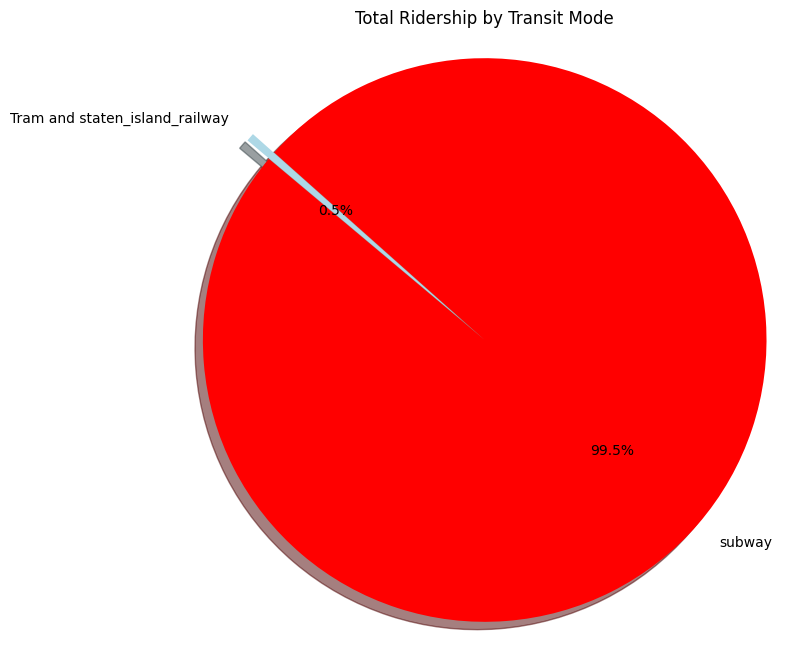

In [31]:
# Aggregate data excluding subway
other_ridership = ridership_by_mode[ridership_by_mode['transit_mode'].isin(['staten_island_railway', 'tram'])]['ridership'].sum()

# Create new data
new_data = pd.DataFrame({'transit_mode': ['Tram and staten_island_railway'], 'ridership': [other_ridership]})

# Combine with subway data
updated_ridership = pd.concat([ridership_by_mode[ridership_by_mode['transit_mode'] == 'subway'], new_data], ignore_index=True)

# Explode setting to push pie slices slightly outward
explode = [0.1, 0]  # For the first slice
colors = ['red', 'lightblue']  # Red for subway, light blue for others

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(updated_ridership['ridership'], 
        labels=updated_ridership['transit_mode'], 
        autopct='%1.1f%%', 
        startangle=140, 
        explode=explode,
        colors=colors,  # Set colors
        shadow=True)  # For a shadow effect

plt.title('Total Ridership by Transit Mode')
plt.axis('equal')  # Equal aspect ratio
plt.show()

In [16]:
# 17,970 people used transit modes other than subway in December!!
# Filter only subway data
df = df[df['transit_mode'] == 'subway']
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,year,month
58135584,2023-12-01,subway,183,Rockaway Av (C),Brooklyn,omny,OMNY - Full Fare,6,0,40.678340,-73.911950,POINT (-73.91195 40.67834),2023,12
58169962,2023-12-01,subway,428,"174 St (2,5)",Bronx,metrocard,Metrocard - Fair Fare,3,0,40.837288,-73.887730,POINT (-73.88773 40.837288),2023,12
58102097,2023-12-01,subway,108,Middle Village-Metropolitan Av (M),Queens,metrocard,Metrocard - Full Fare,2,1,40.711395,-73.889600,POINT (-73.8896 40.711395),2023,12
58129543,2023-12-01,subway,58,"Coney Island-Stillwell Av (D,F,N,Q)",Brooklyn,metrocard,Metrocard - Unlimited 30-Day,6,0,40.577423,-73.981230,POINT (-73.98123 40.577423),2023,12
58188175,2023-12-01,subway,39,Bay Ridge-95 St (R),Brooklyn,metrocard,Metrocard - Seniors & Disability,1,1,40.616623,-74.030876,POINT (-74.030876 40.616623),2023,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31201947,2023-12-31,subway,257,Sutphin Blvd (F),Queens,metrocard,Metrocard - Unlimited 30-Day,1,0,40.705460,-73.810710,POINT (-73.81071 40.70546),2023,12
31201950,2023-12-31,subway,42,"Prospect Park (B,Q,S)",Brooklyn,metrocard,Metrocard - Full Fare,6,0,40.661613,-73.962250,POINT (-73.96225 40.661613),2023,12
31202016,2023-12-31,subway,385,176 St (4),Bronx,metrocard,Metrocard - Unlimited 7-Day,1,0,40.848480,-73.911800,POINT (-73.9118 40.84848),2023,12
31172850,2023-12-31,subway,123,Grand St (L),Brooklyn,metrocard,Metrocard - Fair Fare,2,0,40.711926,-73.940670,POINT (-73.94067 40.711926),2023,12


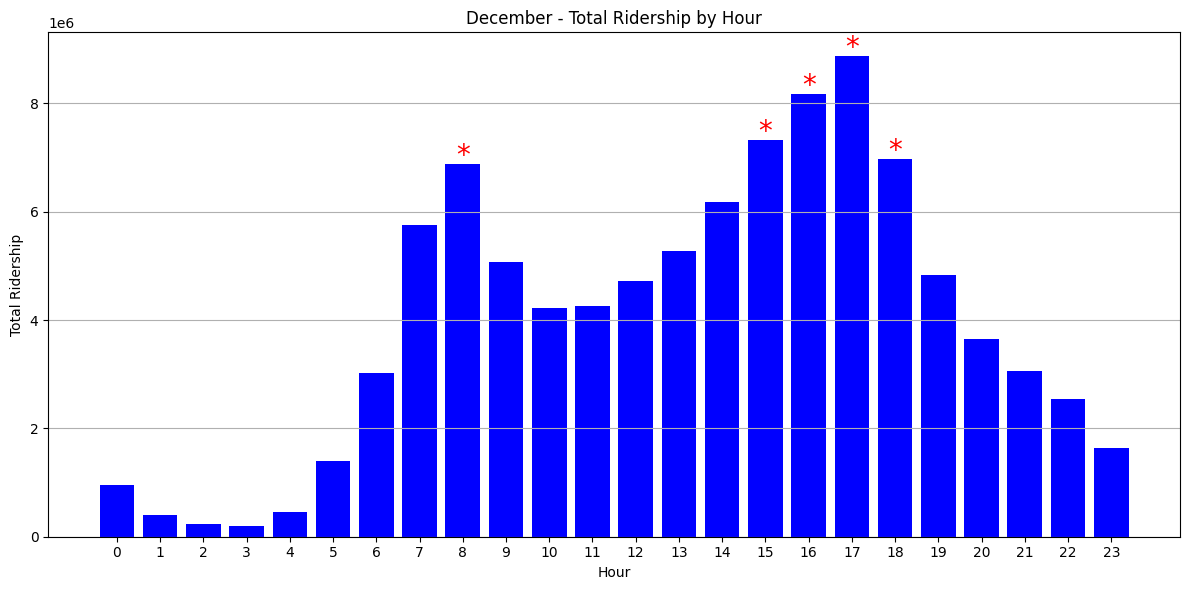

In [33]:
# Filtreleme ve copy ile kopya oluştur
df = df[df['transit_mode'] == 'subway'].copy()

# Saat bilgisi çıkarma
df['hour'] = df['transit_timestamp'].dt.hour

# Saat bazında toplam yolcu sayısı hesapla
hourly_ridership = df.groupby('hour')['ridership'].sum().reset_index()

# Grafik oluşturma
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_ridership['hour'], hourly_ridership['ridership'], color='blue')
plt.xlabel('Hour')
plt.ylabel('Total Ridership')
plt.title('December - Total Ridership by Hour')
plt.xticks(hourly_ridership['hour'])  # Tüm saatleri etiketle
plt.grid(axis='y')

# En yoğun 5 saati bul
top_5 = hourly_ridership.nlargest(5, 'ridership')

# Yıldız işareti ekle
for index, row in top_5.iterrows():
    plt.annotate('*', 
                 xy=(row['hour'], row['ridership']), 
                 xytext=(row['hour'], row['ridership'] + 500), 
                 ha='center', color='red', fontsize=20)

plt.tight_layout()
plt.show()


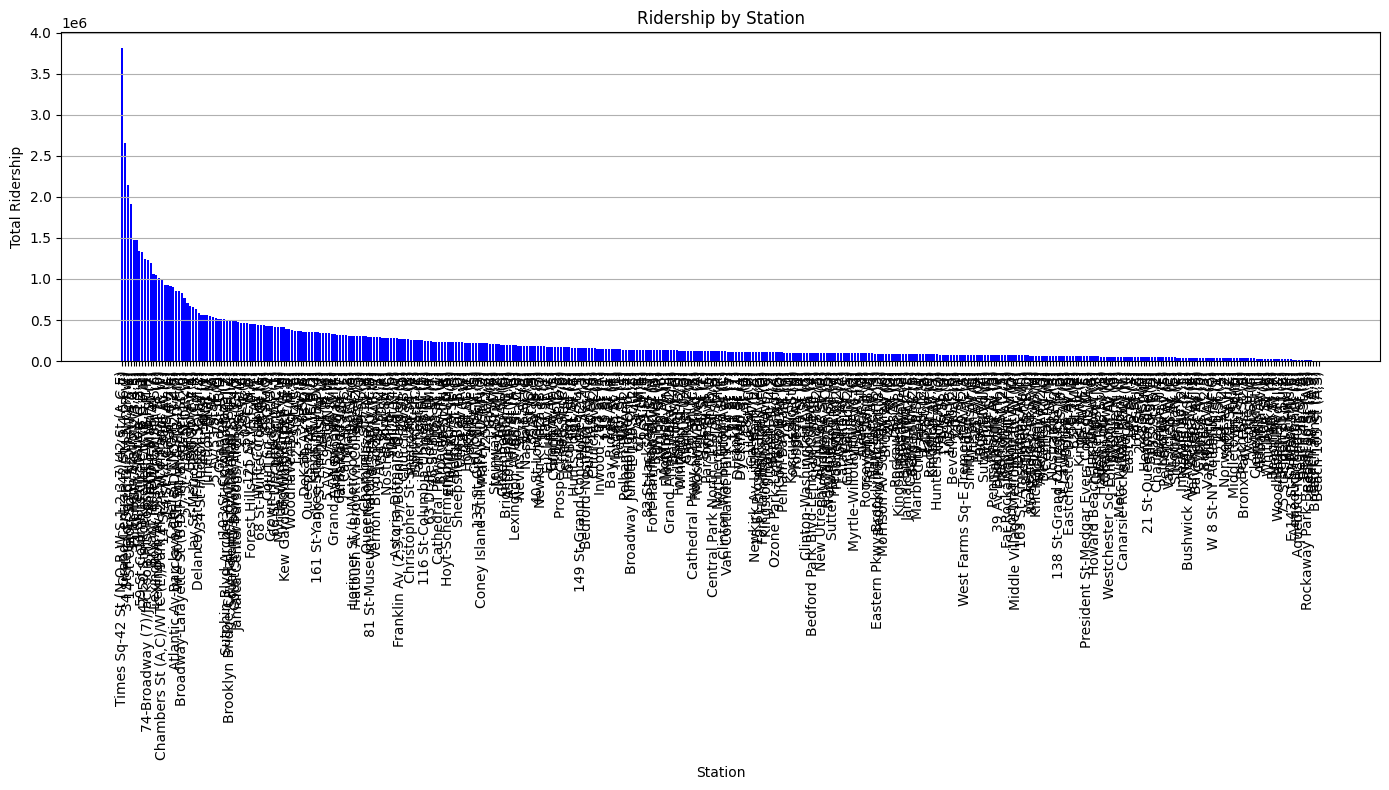

In [18]:
# Calculate ridership by station
station_ridership = df.groupby('station_complex')['ridership'].sum().reset_index()
station_ridership = station_ridership.sort_values(by='ridership', ascending=False)

# Create ridership intensity graph by station
plt.figure(figsize=(14, 8))
plt.bar(station_ridership['station_complex'], station_ridership['ridership'], color='blue')
plt.xlabel('Station')
plt.ylabel('Total Ridership')
plt.title('Ridership by Station')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

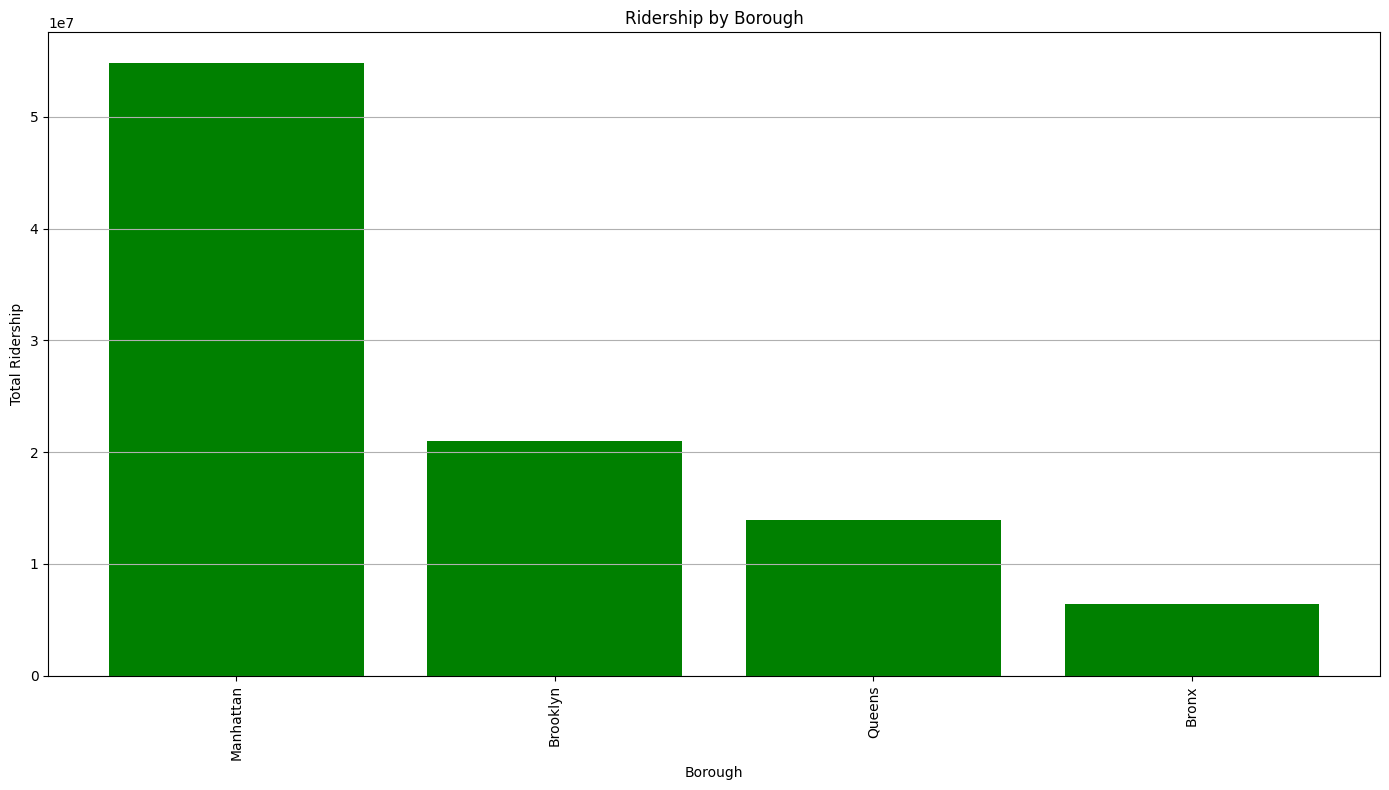

In [19]:
# Calculate ridership by borough
borough_ridership = df.groupby('borough')['ridership'].sum().reset_index()
borough_ridership = borough_ridership.sort_values(by='ridership', ascending=False)

# Create ridership intensity graph by borough
plt.figure(figsize=(14, 8))
plt.bar(borough_ridership['borough'], borough_ridership['ridership'], color='green')
plt.xlabel('Borough')
plt.ylabel('Total Ridership')
plt.title('Ridership by Borough')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
borough_ridership

,borough,ridership
2,Manhattan,54826436
1,Brooklyn,21014926
3,Queens,13888654
0,Bronx,6364931


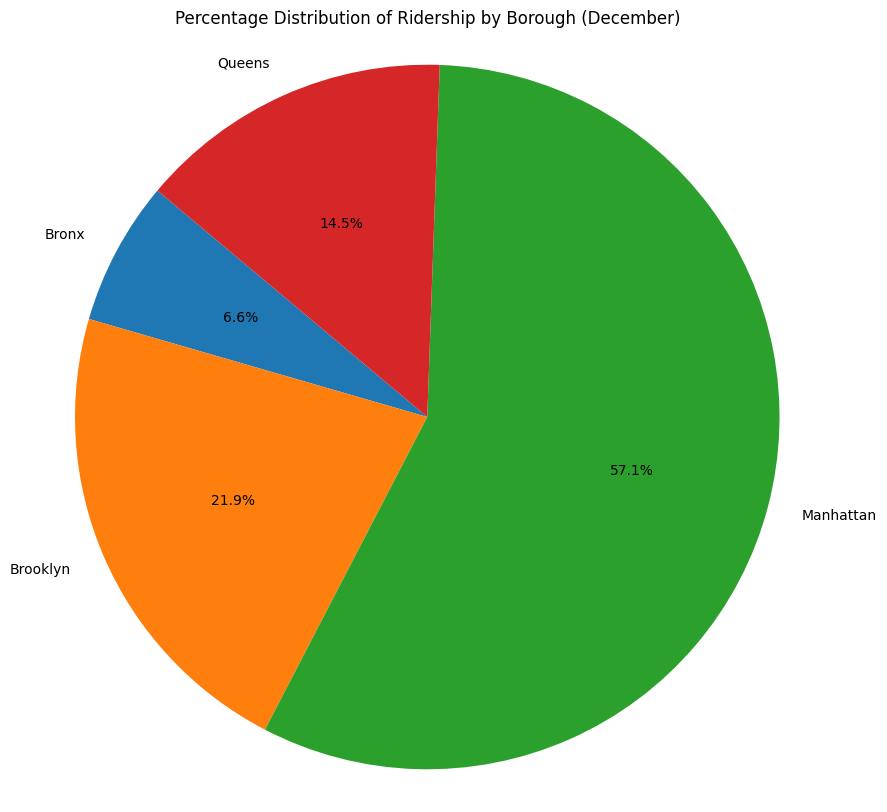

In [21]:
# Calculate ridership by borough
borough_ridership = df.groupby('borough')['ridership'].sum().reset_index()

# Calculate percentage
borough_ridership['percentage'] = (borough_ridership['ridership'] / borough_ridership['ridership'].sum()) * 100

# Create pie chart
plt.figure(figsize=(10, 10))
plt.pie(borough_ridership['percentage'], labels=borough_ridership['borough'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Ridership by Borough (December)')
plt.axis('equal')  # Equal aspect ratio
plt.show()

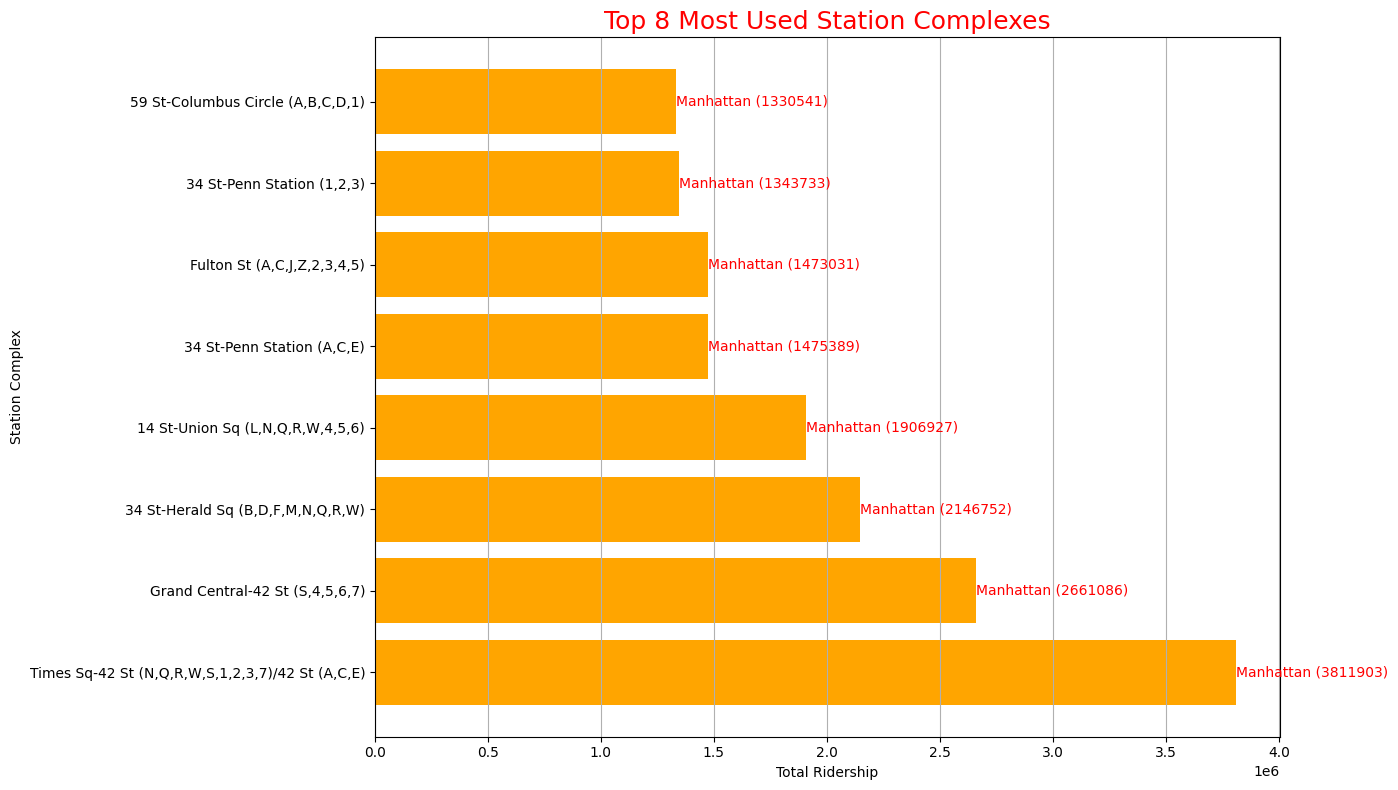

In [22]:
# Calculate ridership by station
station_ridership = df.groupby(['station_complex', 'borough'])['ridership'].sum().reset_index()

# Find top 8 stations with highest ridership
top_8_stations = station_ridership.nlargest(8, 'ridership')

# Create horizontal bar chart
plt.figure(figsize=(14, 8))
bars = plt.barh(top_8_stations['station_complex'], top_8_stations['ridership'], color='orange')
plt.ylabel('Station Complex')
plt.xlabel('Total Ridership')
plt.title('Top 8 Most Used Station Complexes', color='red', fontsize=18)

# Add borough info and ridership next to bars
for bar, borough, ridership in zip(bars, top_8_stations['borough'], top_8_stations['ridership']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{borough} ({ridership})', ha='left', va='center', color='red', fontsize=10)

plt.grid(axis='x')
plt.tight_layout()
plt.show()

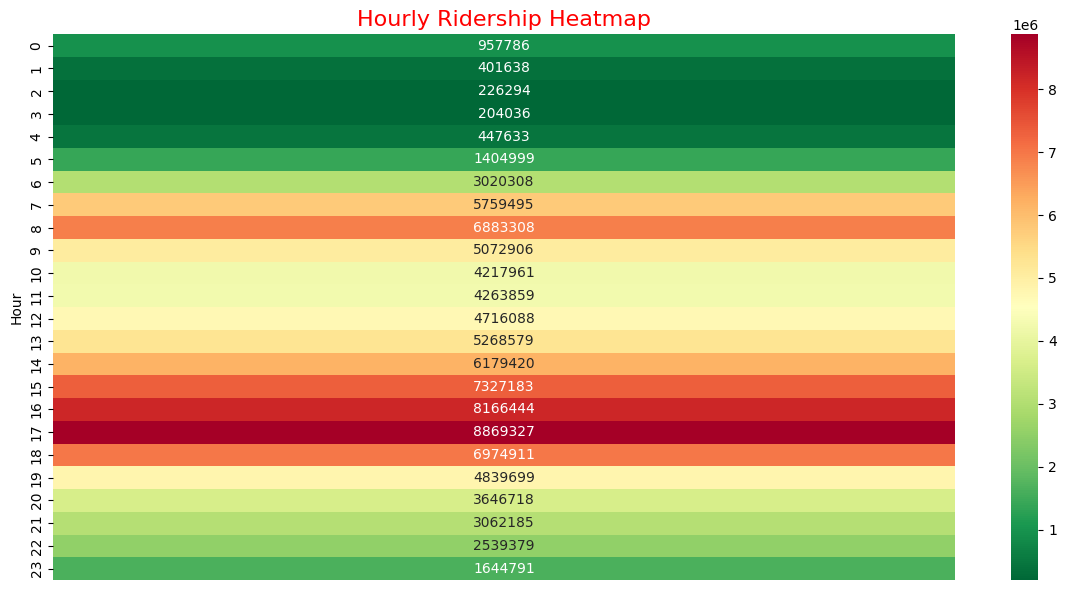

In [23]:
# Group by hour
hourly_ridership = df.groupby(df['transit_timestamp'].dt.hour)['ridership'].sum()

# Hourly heatmap
plt.figure(figsize=(12, 6))

# Color map: busy hours in red, less busy in green
sns.heatmap(hourly_ridership.values.reshape(-1, 1), cmap='RdYlGn_r', annot=True, fmt='.0f')

plt.title('Hourly Ridership Heatmap', fontsize=16, color='red')
plt.ylabel('Hour')
plt.yticks(np.arange(0.5, 24.5, 1), np.arange(24))  # Align hour labels properly
plt.xticks([])  # Hide x-axis labels
plt.tight_layout()
plt.show()

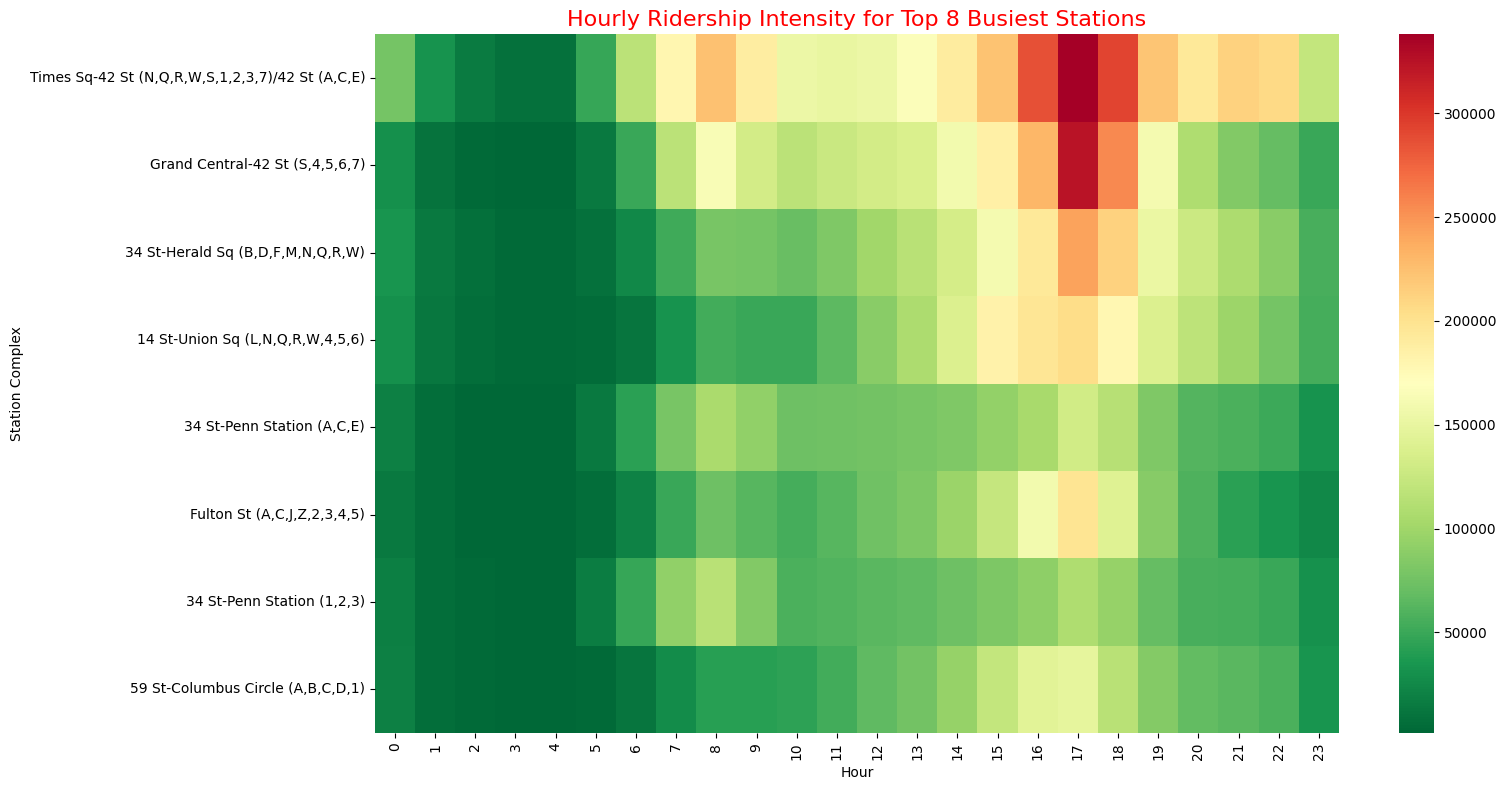

In [24]:
# Group ridership by station and hour
station_hourly_ridership = df.groupby([df['station_complex'], df['transit_timestamp'].dt.hour])['ridership'].sum().unstack()

# Fill missing values with 0
station_hourly_ridership = station_hourly_ridership.fillna(0)

# Select the top 8 stations with the highest ridership
top_8_stations = station_hourly_ridership.sum(axis=1).nlargest(8).index

# Take only the busiest 8 stations
top_8_station_hourly_ridership = station_hourly_ridership.loc[top_8_stations]

# Set figure size
plt.figure(figsize=(16, 8))

# Create heatmap (Red: High, Green: Low)
sns.heatmap(top_8_station_hourly_ridership, cmap='RdYlGn_r', annot=False, fmt='.0f')

# Title and axis labels
plt.title('Hourly Ridership Intensity for Top 8 Busiest Stations', fontsize=16, color='red')
plt.xlabel('Hour')
plt.ylabel('Station Complex')

# Rotate hour labels
plt.xticks(rotation=90)

# Keep station names horizontal
plt.yticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [25]:
# Grouping by station and hour
station_hourly_ridership = df.groupby([df['station_complex'], df['transit_timestamp'].dt.hour])['ridership'].sum().unstack()

# Fill missing values with zero
station_hourly_ridership = station_hourly_ridership.fillna(0)

# Find the top 5 stations with the highest ridership
top_5_stations = station_hourly_ridership.sum(axis=1).nlargest(5).index

# Select only the busiest 5 stations
top_5_station_hourly_ridership = station_hourly_ridership.loc[top_5_stations]

# For each station, find the top 4 busiest hours by ridership
top_5_busy_hours = []

for station in top_5_station_hourly_ridership.index:
    top_4_hours = top_5_station_hourly_ridership.loc[station].nlargest(4)
    for hour, ridership in top_4_hours.items():  # using 'items()' instead of 'iteritems()'
        top_5_busy_hours.append({
            'station_complex': station,
            'hour': hour,
            'ridership': ridership
        })

# Create a DataFrame
top_5_busy_hours_df = pd.DataFrame(top_5_busy_hours)

# Display the resulting DataFrame
top_5_busy_hours_df


,station_complex,hour,ridership
0,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",17,338096
1,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",18,292989
2,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",16,285598
3,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)",8,223857
4,"Grand Central-42 St (S,4,5,6,7)",17,323896
5,"Grand Central-42 St (S,4,5,6,7)",18,255642
6,"Grand Central-42 St (S,4,5,6,7)",16,230611
7,"Grand Central-42 St (S,4,5,6,7)",15,186886
8,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",17,243231
9,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",18,212058


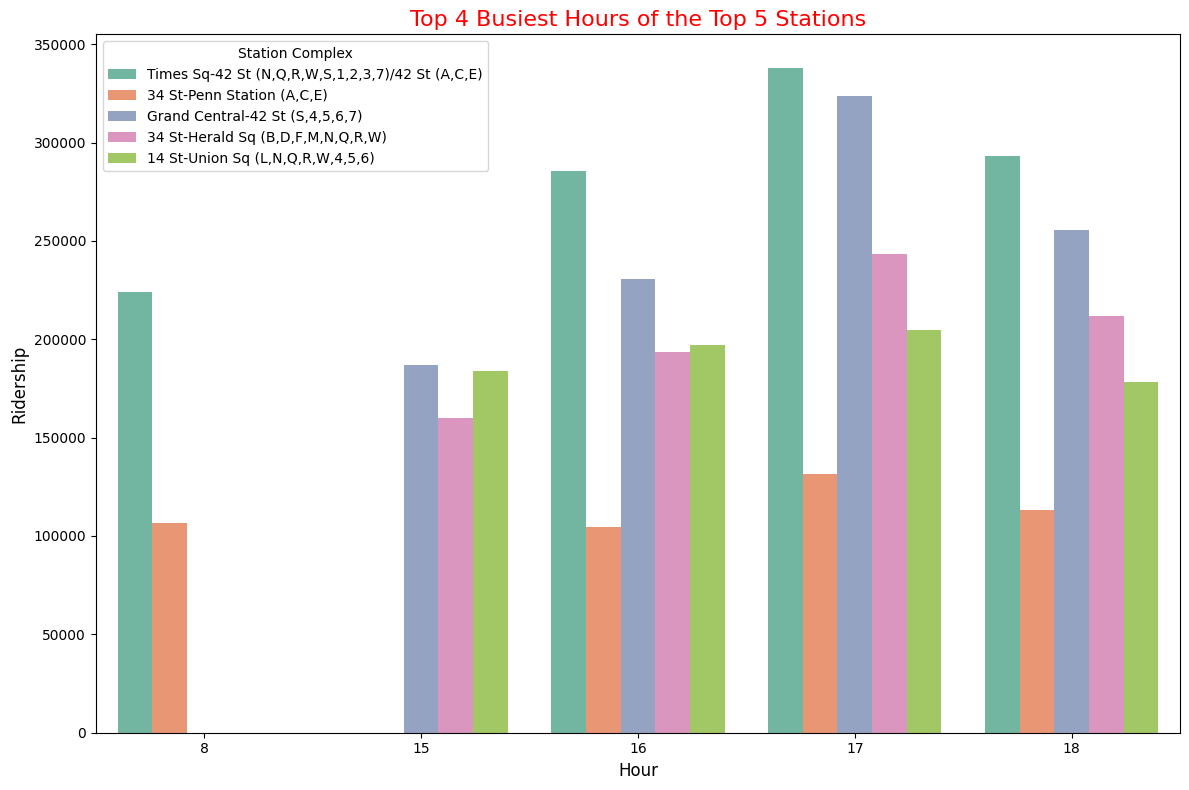

In [26]:
# Prepare data for visualization
plt.figure(figsize=(12, 8))

# Bar plot for each station
sns.barplot(x='hour', y='ridership', hue='station_complex', data=top_5_busy_hours_df, palette='Set2')

# Title and labels
plt.title('Top 4 Busiest Hours of the Top 5 Stations', fontsize=16, color='red')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Ridership', fontsize=12)
plt.legend(title='Station Complex')

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


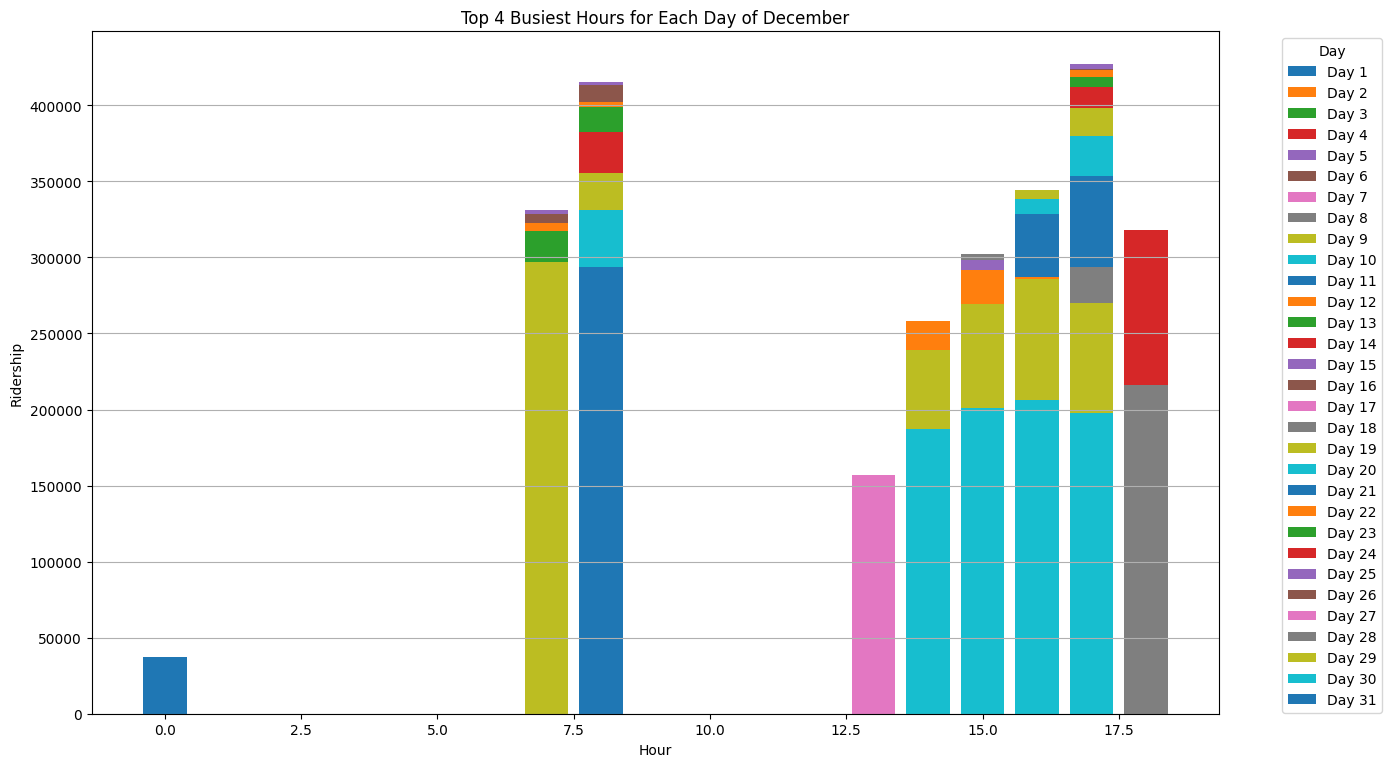

In [27]:
# Calculate ridership by day and hour
daily_hourly_ridership = df.groupby([df['transit_timestamp'].dt.day, df['transit_timestamp'].dt.hour])['ridership'].sum().unstack()

# Fill missing values with zero
daily_hourly_ridership = daily_hourly_ridership.fillna(0)

# Find the top 4 busiest hours for each day
top_4_hours_per_day = daily_hourly_ridership.apply(lambda x: x.nlargest(4), axis=1)

# Create bar plot
plt.figure(figsize=(14, 8))

# Visualize the top 4 busiest hours for each day
for day in top_4_hours_per_day.index:
    plt.bar(top_4_hours_per_day.columns, top_4_hours_per_day.loc[day], label=f'Day {day}')

plt.xlabel('Hour')
plt.ylabel('Ridership')
plt.title('Top 4 Busiest Hours for Each Day of December')
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

# Show plot
plt.show()


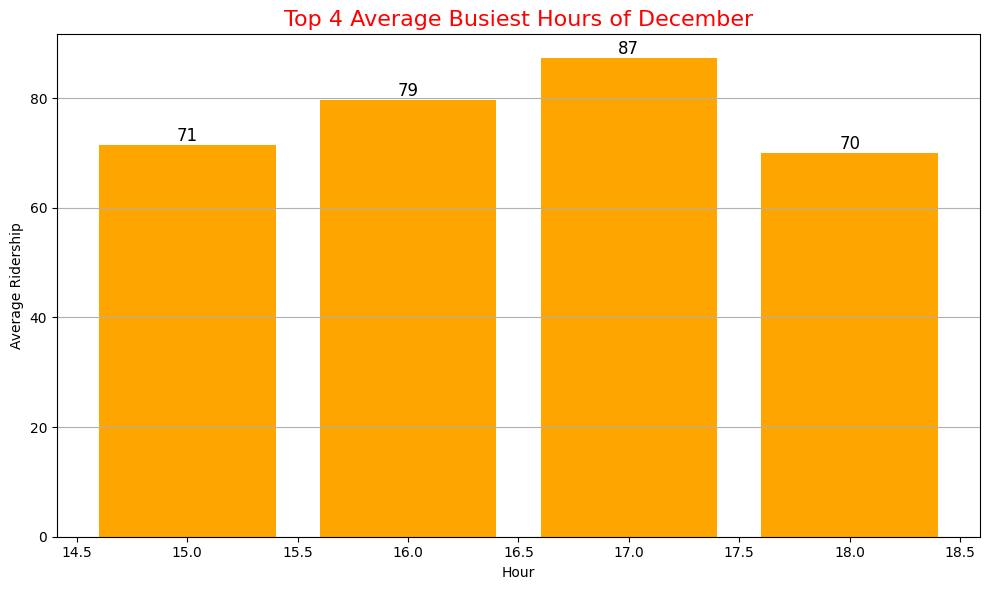

In [28]:
# Calculate average ridership by hour
hourly_avg_ridership = df.groupby(df['transit_timestamp'].dt.hour)['ridership'].mean()

# Find the top 4 busiest hours based on average ridership
top_4_hours = hourly_avg_ridership.nlargest(4)

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_4_hours.index, top_4_hours.values, color='orange')
plt.xlabel('Hour')
plt.ylabel('Average Ridership')
plt.title('Top 4 Average Busiest Hours of December', fontsize=16, color='red')
plt.grid(axis='y')

# Add ridership numbers above the bars
for i, value in enumerate(top_4_hours.values):
    plt.text(top_4_hours.index[i], value, f'{int(value)}', ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()


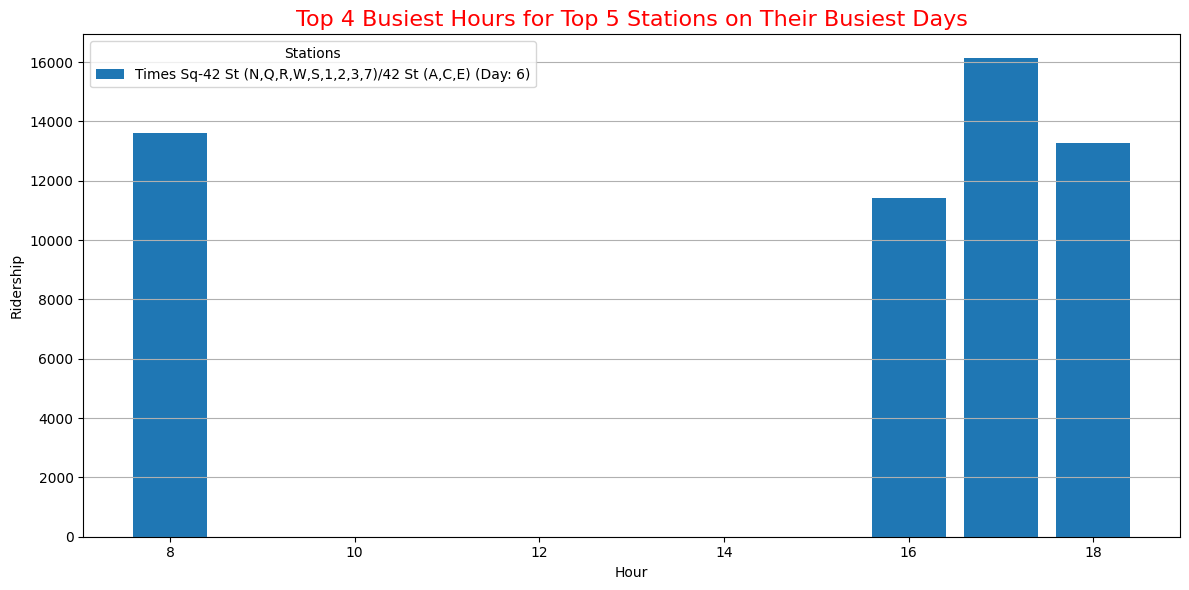

In [29]:
# Group by station, day, and hour; sum ridership, then unstack hour to columns
station_daily_hourly = df.groupby(
    [df['station_complex'], df['transit_timestamp'].dt.day, df['transit_timestamp'].dt.hour]
)['ridership'].sum().unstack(level=2)  # unstack hour level

# Sum ridership over all days and hours per station to find top 5 stations
top_5_stations = station_daily_hourly.sum(axis=1).nlargest(5).index

# Filter only top 5 stations
top_5_station_daily_hourly = station_daily_hourly.loc[top_5_stations]

# Prepare list to store top 4 busiest hours for each station's busiest day
top_5_busy_hours = []

for station in top_5_station_daily_hourly.index:
    # station is a tuple: (station_complex, day)
    station_name, day = station
    # Get ridership series for the hours of this station-day
    hourly_ridership = top_5_station_daily_hourly.loc[station]
    # Find top 4 hours for this station-day
    top_4_hours = hourly_ridership.nlargest(4)
    for hour, ridership in top_4_hours.items():
        top_5_busy_hours.append({
            'station_complex': station_name,
            'day': day,
            'hour': hour,
            'ridership': ridership
        })

# Create DataFrame
top_5_busy_hours_df = pd.DataFrame(top_5_busy_hours)

# Plot bar chart
plt.figure(figsize=(12, 6))
for station in top_5_busy_hours_df['station_complex'].unique():
    subset = top_5_busy_hours_df[top_5_busy_hours_df['station_complex'] == station]
    plt.bar(subset['hour'], subset['ridership'], label=f'{station} (Day: {subset["day"].values[0]})')

plt.xlabel('Hour')
plt.ylabel('Ridership')
plt.title('Top 4 Busiest Hours for Top 5 Stations on Their Busiest Days', fontsize=16, color='red')
plt.legend(title='Stations')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


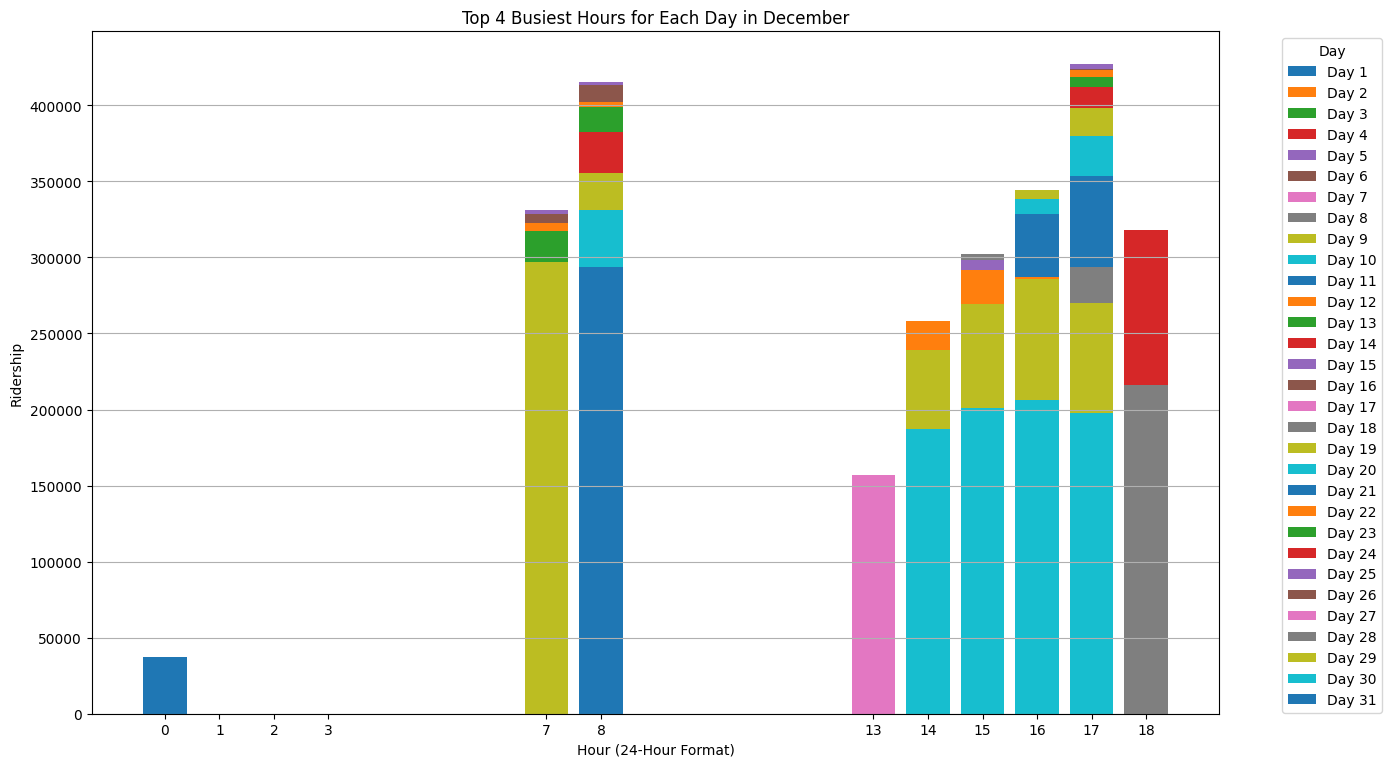

In [30]:
# Create bar plot
plt.figure(figsize=(14, 8))

# Visualize the top 4 busiest hours for each day
for day in top_4_hours_per_day.index:
    plt.bar(top_4_hours_per_day.columns, top_4_hours_per_day.loc[day], label=f'Day {day}')

# Set x-axis labels in 24-hour format
plt.xticks(top_4_hours_per_day.columns, labels=top_4_hours_per_day.columns, rotation=0)

plt.xlabel('Hour (24-Hour Format)')
plt.ylabel('Ridership')
plt.title('Top 4 Busiest Hours for Each Day in December')
plt.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()
